In [75]:
import cv2 
import sys 
import os 
import numpy as np
import matplotlib.pyplot as plt

# Play the video and extract the frames

In [76]:
'''Capture the video.'''
path_to_vid = "E:/Documents/University/2018 Semester 2/COMP3419 Graphics and Multimedia/Labs/Lab Materials/pingpang.mov"
vid_cap = cv2.VideoCapture(path_to_vid)

if vid_cap.isOpened() == False: 
    print("Error capturing video.")
    sys.exit(1)
time_length = int(vid_cap.get(cv2.CAP_PROP_FRAME_COUNT)) #count total number of frames in vid
frame_height = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_width = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(time_length, frame_height, frame_width)

120 1080 1920


In [77]:
'''Extract the frames and store into list'''
frame_save_path = "E:/Documents/University/2018 Semester 2/COMP3419 Graphics and Multimedia/Labs/Ping pong/"
frames = []
colour_frames = []
frame_counter = 0
while(True): 
    ret, frame = vid_cap.read() 
    if ret == False: 
        print("No more frames in video file.")
        break 
    resize = cv2.resize(frame, (640, 360))     
    cv2.imshow('Ping Pong', resize)
    frame_gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    frames.append(frame_gray)
    colour_frames.append(resize)
    cv2.imwrite(frame_save_path + 'frame%d.tif' % frame_counter, frame_gray)
    frame_counter += 1
    if cv2.waitKey(30) & 0xff == ord('q'):
        break
vid_cap.release()
cv2.destroyAllWindows() 

No more frames in video file.


(360, 640)
50


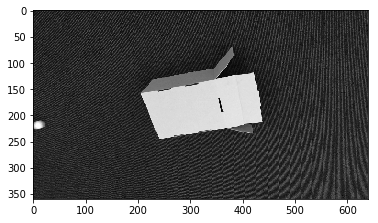

In [78]:
'''Test that images were correctly converted to grayscale'''
plt.imshow(frames[51], cmap=plt.cm.gray)
print(frames[0].shape)
print(frames[0][0,2])

# Segment ball with pixel intensity threshold

In [79]:
threshold = 250 
'''for each frame, record the coodinates of the pixels that have an intensity greater than the threshold.'''
coordinates = {}
frame_counter = 0 
for frame in frames: # for every frame 
    for x in range(0, 360): #for every point in the frame 
        for y in range(0, 640):
            intensity_val = frame[x, y]
            if str(frame_counter) not in coordinates: 
                coordinates[str(frame_counter)] = [] 
            if intensity_val > threshold: 
                coordinates[str(frame_counter)].append((x,y)) 
    frame_counter += 1

# Calculate mean coordinates for each frame 

In [80]:
'''For each chosen coordinates in frame, calculate the mean coordinates.'''
mean_coordinates = {}
frame_counter = 0
for coordinate_list in coordinates.values(): 
    #iterate through list of coordinates 
    N = len(coordinate_list)
    if N == 0: 
        mean_coordinates[str(frame_counter)] = -1 #the case where the ball is not in the frame 
        frame_counter += 1 
        continue 
    x_sum = sum([pair[0] for pair in coordinate_list])
    y_sum = sum([pair[1] for pair in coordinate_list])
    x_bar = int(x_sum/N)
    y_bar = int(y_sum/N)
    mean_coordinates[str(frame_counter)] = (x_bar, y_bar)
    frame_counter += 1

# For each frame, draw dot on mean coordinates and line between frames

In [81]:
frame_counter = 0
frame_save_path = "E:/Documents/University/2018 Semester 2/COMP3419 Graphics and Multimedia/Labs/ping pong tracker/"
for i in range(50, time_length): #for each frame 
    #print(i)
    curr_coordinates = mean_coordinates[str(i)]
    if curr_coordinates == -1: 
        cv2.imwrite(frame_save_path + 'frame%d.tif' % frame_counter, colour_frames[i])
        frame_counter += 1
        continue 
    curr_x = curr_coordinates[0]
    curr_y = curr_coordinates[1]
    new_frame = cv2.circle(colour_frames[i], (curr_y, curr_x), 2, (0,255,0), -1) 
    
    if i != 0: #draw line from previous frame to current frame
        prev_coordinates = mean_coordinates[str(i-1)]
        if prev_coordinates == -1: continue
        prev_x = prev_coordinates[0]
        prev_y = prev_coordinates[1]
        curr_coordinates = mean_coordinates[str(i)]
        cv2.line(new_frame, (prev_y, prev_x), (curr_y, curr_x), (0,255,0), 2)
        
    cv2.imwrite(frame_save_path + 'frame%d.tif' % frame_counter, new_frame)
    frame_counter += 1

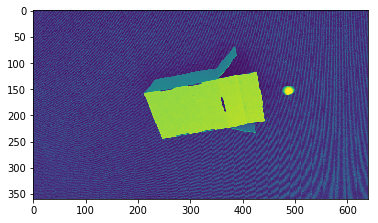

In [53]:
#testing 
plt.imshow(new_frames[30])

# Play the frames and output to video

In [82]:
path_to_output_video = frame_save_path + "ping tracker.mov"

In [85]:
out = cv2.VideoWriter(path_to_output_video, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 20, (640, 360))
frame_counter = 0
while(1): 
    img = cv2.imread(frame_save_path + 'frame%d.tif' % frame_counter)
    if img is None: 
        print('No more frames.')
        break
    out.write(img)
    frame_counter += 1
# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

No more frames.
